In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the Data

### 1.1. Inspect the Data
- Data records for general aviation and commercial air carrier incidents since 1978, collected from FAA's Accident and Incident Data Systems
- 100000 data points
- general deatils (date, aircraft, operator, location)
- flight and pilot details (aircraft damage, injuries, pic cert type, pic total hrs, pic make-model hrs)

In [86]:
df=pd.read_csv('../data/faa_incidents_data.csv')

/tmp/ipykernel_42413/3494293613.py:1: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/faa_incidents_data.csv')


In [4]:
df.head()

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,,.1
0,19780101000019I,01-JAN-78,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,245.0,136.0,0.0,0.0
1,19780101000029I,01-JAN-78,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,...,0,NaN,NaN,NaN,1.0,STUDENT,200.0,2.0,0.0,0.0
2,19780101000039I,01-JAN-78,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,NaN,NORMAL CRUISE,BEECH,35,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,NaN,0.0,0.0,0.0
3,19780101000049I,01-JAN-78,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,...,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0,0.0,0.0
4,19780101000059I,01-JAN-78,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,...,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,300.0,130.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   AIDS Report Number                100000 non-null  object 
 1   Local Event Date                  100000 non-null  object 
 2   Event City                        91364 non-null   object 
 3   Event State                       99234 non-null   object 
 4   Event Airport                     81398 non-null   object 
 5   Event Type                        100000 non-null  object 
 6   Aircraft Damage                   71199 non-null   object 
 7   Flight Phase                      99758 non-null   object 
 8   Aircraft Make                     97441 non-null   object 
 9   Aircraft Model                    96928 non-null   object 
 10  Aircraft Series                   96927 non-null   object 
 11  Operator                          29974 non-null   ob

In [6]:
print(df.columns.values)

['AIDS Report Number' 'Local Event Date' 'Event City' 'Event State'
 'Event Airport' 'Event Type' 'Aircraft Damage' 'Flight Phase'
 'Aircraft Make' 'Aircraft Model' 'Aircraft Series' 'Operator'
 'Primary Flight Type' 'Flight Conduct Code' 'Flight Plan Filed Code'
 'Aircraft Registration Nbr' 'Total Fatalities' 'Total Injuries'
 'Aircraft Engine Make' 'Aircraft Engine Model' 'Engine Group Code'
 'Nbr of Engines' 'PIC Certificate Type' 'PIC Flight Time Total Hrs'
 'PIC Flight Time Total Make-Model' ' ' ' .1']


### 1.2. Clean the Data

In [87]:
# Drop columns
df=df.drop(columns=['AIDS Report Number', 'Event Type', 'Aircraft Series', 'Operator', 'Primary Flight Type', 'Flight Conduct Code', 
        'Flight Plan Filed Code', 'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code', ' ', ' .1'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Local Event Date                  100000 non-null  object 
 1   Event City                        91364 non-null   object 
 2   Event State                       99234 non-null   object 
 3   Event Airport                     81398 non-null   object 
 4   Aircraft Damage                   71199 non-null   object 
 5   Flight Phase                      99758 non-null   object 
 6   Aircraft Make                     97441 non-null   object 
 7   Aircraft Model                    96928 non-null   object 
 8   Aircraft Registration Nbr         100000 non-null  object 
 9   Total Fatalities                  100000 non-null  int64  
 10  Total Injuries                    100000 non-null  int64  
 11  Nbr of Engines                    93004 non-null   fl

In [ ]:
# Count NaN values
df.isnull().sum(axis=0)

Local Event Date                        0
Event City                           8636
Event State                           766
Event Airport                       18602
Event Type                              0
Aircraft Damage                     28801
Flight Phase                          242
Aircraft Make                        2559
Aircraft Model                       3072
Aircraft Registration Nbr               0
Total Fatalities                        0
Total Injuries                          0
Nbr of Engines                       6996
PIC Certificate Type                 8526
PIC Flight Time Total Hrs           20193
PIC Flight Time Total Make-Model    14947
dtype: int64

In [88]:
# Drop NaN rows
df.dropna(how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42124 entries, 0 to 99997
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Local Event Date                  42124 non-null  object 
 1   Event City                        42124 non-null  object 
 2   Event State                       42124 non-null  object 
 3   Event Airport                     42124 non-null  object 
 4   Aircraft Damage                   42124 non-null  object 
 5   Flight Phase                      42124 non-null  object 
 6   Aircraft Make                     42124 non-null  object 
 7   Aircraft Model                    42124 non-null  object 
 8   Aircraft Registration Nbr         42124 non-null  object 
 9   Total Fatalities                  42124 non-null  int64  
 10  Total Injuries                    42124 non-null  int64  
 11  Nbr of Engines                    42124 non-null  float64
 12  PIC Certi

In [89]:
# Combine aircraft make and model
df['Aircraft Make-Model'] = df[['Aircraft Make', 'Aircraft Model']].agg(' '.join, axis=1)

# Drop individual make and model columns
df=df.drop(columns=['Aircraft Make', 'Aircraft Model'])

In [90]:
# Convert date obj to dtm
df['Local Event Date']=pd.to_datetime(df['Local Event Date'], format= '%d-%b-%y')

In [91]:
# Save clean df
df.to_parquet('../data/clean_df.parquet')

## 2. EDA

### 2.1. Explore the Data

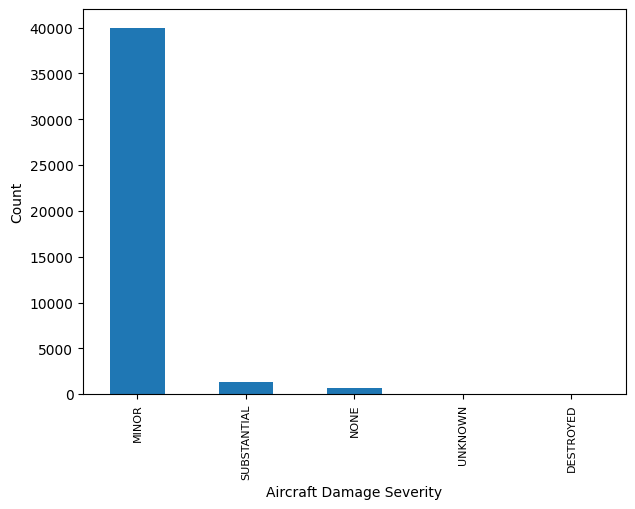

In [26]:
# Bar Plot: Aircraft Damage

# Get count
count=df['Aircraft Damage'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(7, 5))

# Plot the bar plot
count.plot(kind='bar')

# Set title and labels
plt.xlabel('Aircraft Damage Severity')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

In [25]:
df['Aircraft Damage'].value_counts()

Aircraft Damage
MINOR          40002
SUBSTANTIAL     1311
NONE             710
UNKNOWN           60
DESTROYED         41
Name: count, dtype: int64

The vast marjority of damage is minor, with very few incidents of substantial damage and extremely few instances of destroyed aircraft. 

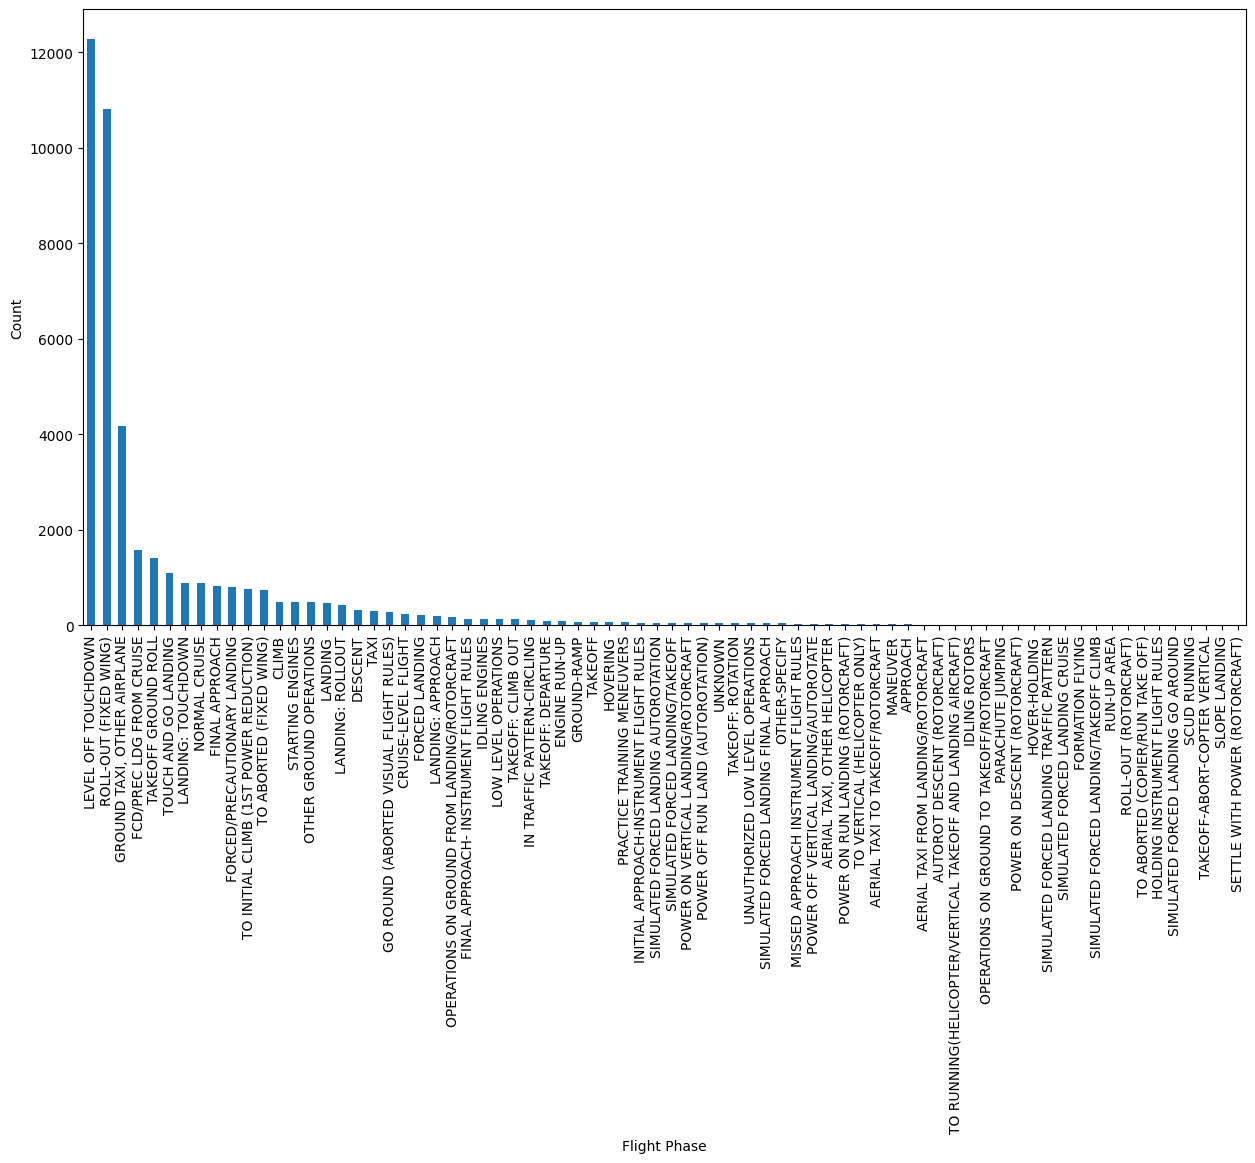

In [30]:
# Bar Plot: Flight Phase

# Get count
count=df['Flight Phase'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Plot the bar plot
count.plot(kind='bar')

# Set title and labels
plt.xlabel('Flight Phase')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

In [31]:
df['Flight Phase'].value_counts()

Flight Phase
LEVEL OFF TOUCHDOWN                   12290
ROLL-OUT (FIXED WING)                 10823
GROUND TAXI, OTHER AIRPLANE            4176
FCD/PREC LDG FROM CRUISE               1570
TAKEOFF GROUND ROLL                    1401
                                      ...  
SIMULATED FORCED LANDING GO AROUND        3
SCUD RUNNING                              3
TAKEOFF-ABORT-COPTER VERTICAL             3
SLOPE LANDING                             2
SETTLE WITH POWER (ROTORCRAFT)            1
Name: count, Length: 74, dtype: int64

There are significantly more flight phases than expected! Accidents and incidents most commonly occur during level off touchdown or roll-out (fixed wing). 
- Level off touchdown: the point of transition from nose-low to nose-up attitude, just before landing, until touchdown
- Roll-out (fixed wing): the final phase of landing when focus shifts from touchdown to taxiing

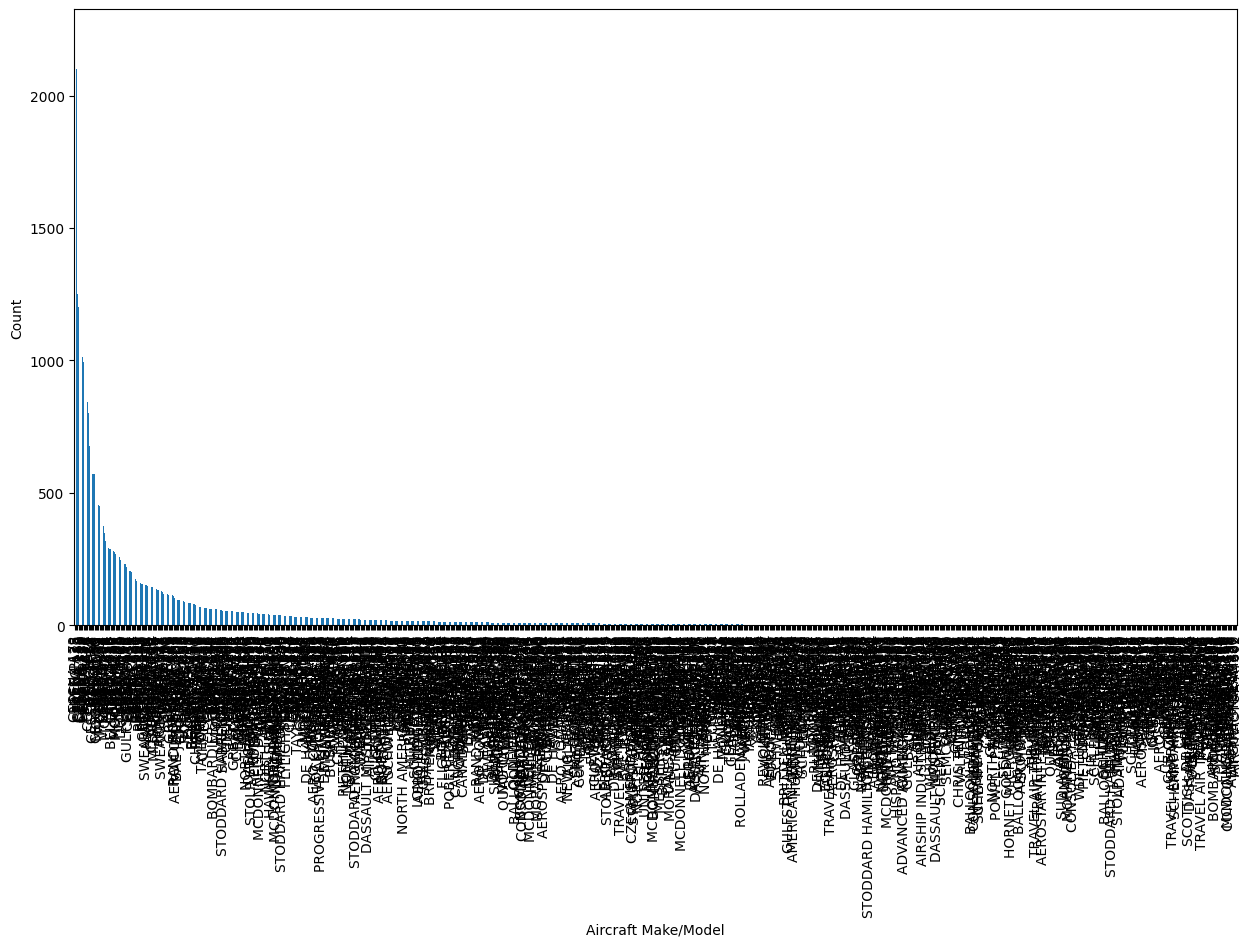

In [ ]:
# Bar Plot: Aircraft Make-Model

# Get count
count=df['Aircraft Make-Model'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Plot the bar plot
count.plot(kind='bar')

# Set title and labels
plt.xlabel('Aircraft Make/Model')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

In [44]:
df['Aircraft Make-Model'].value_counts()

Aircraft Make-Model
CESSNA 172            2215
PIPER PA28            2102
BEECH 35              1252
CESSNA 182            1202
CESSNA 152            1169
                      ... 
EMBRAER ERJ190           1
AEROSPATIALE SA330       1
BELL 427                 1
IAI GULFSTREAM200        1
AIR TRACTOR AT602        1
Name: count, Length: 944, dtype: int64

Over 900 types of aircraft were involved in accidents or incidents. The most common by nearly double are Cessna 172's and Piper PA28's, both of which are light aircraft. 

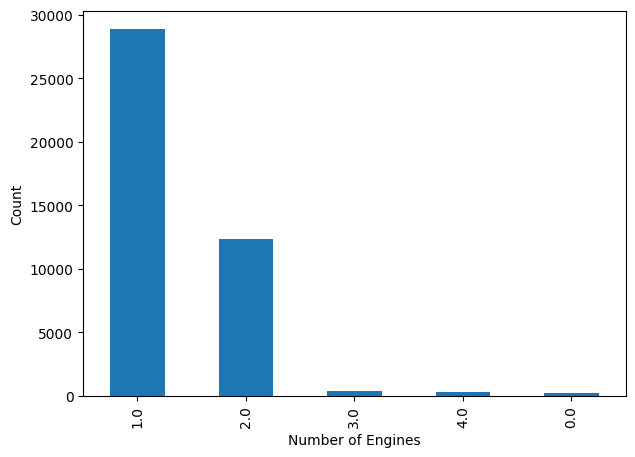

In [47]:
# Bar Plot: Nbr of Engines

# Get count
count=df['Nbr of Engines'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(7, 5))

# Plot the bar plot
count.plot(kind='bar')

# Set title and labels
plt.xlabel('Number of Engines')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

In [48]:
df['Nbr of Engines'].value_counts()

Nbr of Engines
1.0    28861
2.0    12354
3.0      388
4.0      306
0.0      215
Name: count, dtype: int64

Almost 3/4 of accidents are single engine planes. Another 1/4 of accidents are twin engine planes. Only ~700 accidents are from 3 or 4 engine planes.

In [ ]:
# Group PIC Flight Time Total Hrs into bins
bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,14000,16000,18000,20000]
labels=['1000','2000','3000','4000','5000','6000','7000','8000','9000','10000','12000','14000','16000','18000','20000']
df['PIC Total Hrs Bins'] = pd.cut(df['PIC Flight Time Total Hrs'], bins=bins, labels=labels)

# df.head()

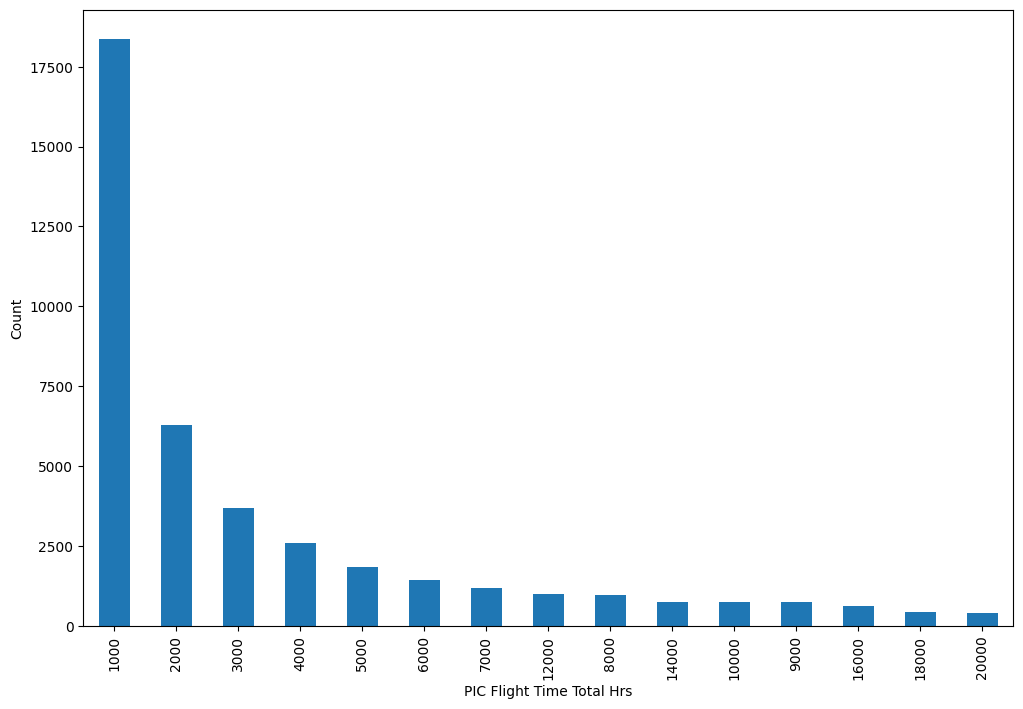

In [61]:
# Bar Plot: PIC Flight Time Total Hrs 

# Get count
count=df['PIC Total Hrs Bins'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the bar plot
count.plot(kind='bar')

# Set title and labels
plt.xlabel('PIC Flight Time Total Hrs')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

In [60]:
df['PIC Total Hrs Bins'].value_counts()

PIC Total Hrs Bins
1000     18368
2000      6287
3000      3682
4000      2590
5000      1854
6000      1421
7000      1172
12000      980
8000       948
14000      742
10000      739
9000       735
16000      628
18000      435
20000      387
Name: count, dtype: int64

Nearly half of all accidents are with pilots who have less than 1000 hours of total flight time. Another 16000 accidents are pilots with 7000 hours or less. The remaining 15% (~6000) of accidents are pilots with over 7000 hours. 

In [ ]:
# Group PIC Flight Time Total Make-Model into bins
bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,14000,16000,18000,20000]
labels=['1000','2000','3000','4000','5000','6000','7000','8000','9000','10000','12000','14000','16000','18000','20000']
df['PIC Make-Model Hrs Bins'] = pd.cut(df['PIC Flight Time Total Make-Model'], bins=bins, labels=labels)

# df.head()

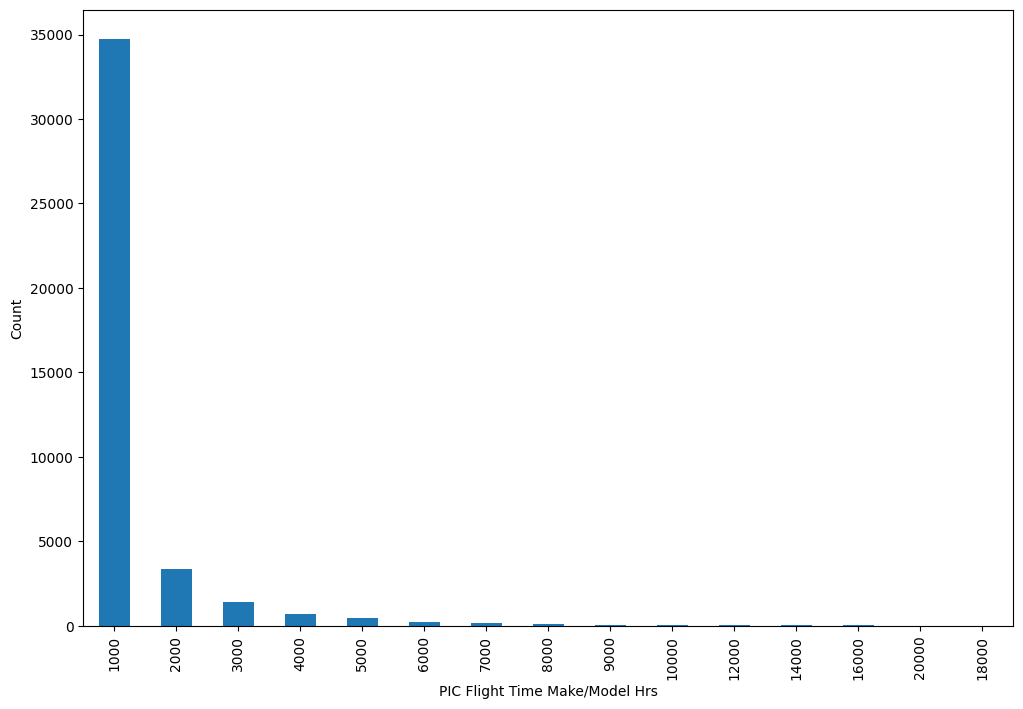

In [65]:
# Bar Plot: PIC Flight Time Total Make-Model 

# Get count
count=df['PIC Make-Model Hrs Bins'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the bar plot
count.plot(kind='bar')

# Set title and labels
plt.xlabel('PIC Flight Time Make/Model Hrs')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

In [66]:
df['PIC Make-Model Hrs Bins'].value_counts()

PIC Make-Model Hrs Bins
1000     34733
2000      3380
3000      1404
4000       719
5000       441
6000       219
7000       156
8000       119
9000        69
10000       66
12000       56
14000       22
16000       15
20000        8
18000        5
Name: count, dtype: int64

Roughly 87% of accidents are with pilots who have less than 1000 hours on the relevant aircraft. For the most part, the more experience a pilot has with an aircraft, the less likely they are to experience an accident. At over 5000 hours, there is <1% chance.

In [74]:
df['Total Fatalities'].value_counts()

Total Fatalities
0    42101
1       18
2        2
3        2
5        1
Name: count, dtype: int64

In [75]:
df['Total Injuries'].value_counts()

Total Injuries
0     41632
1       364
2        82
3        19
4         9
5         5
7         3
6         3
11        2
9         2
10        1
26        1
29        1
Name: count, dtype: int64

There have been less than 35 fatalities and less than 1000 injuries due to accidents.

In [ ]:
# Create year column
df['Year']=pd.to_datetime(df['Local Event Date'], format='%Y').dt.year

# Convert to int to group into bins
df['Year']=df['Year'].astype(int)

0        1978
1        1978
3        1978
4        1978
10       1978
         ... 
99984    2015
99986    2015
99987    2015
99992    2015
99997    2015
Name: Year, Length: 42124, dtype: int32

In [ ]:
# Group Year into bins
bins=[0,1985,1990,1995,2000,2005,2010,2015,2020,2025]
labels=['1985','1990','1995','2000','2005','2010','2015','2020','2025']
df['Date Bins'] = pd.cut(df['Year'], bins=bins, labels=labels)

#df.head()

,Local Event Date,Event City,Event State,Event Airport,Aircraft Damage,Flight Phase,Aircraft Registration Nbr,Total Fatalities,Total Injuries,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,Aircraft Make-Model,Year,Aircraft Made-Model,Date Bins
0,1978-01-01,WAHPETON,ND,BRECKENRIDGE,MINOR,ROLL-OUT (FIXED WING),2691Q,0,0,1.0,PRIVATE PILOT,245.0,136.0,CESSNA 182,1978,1978,1985
1,1978-01-01,FAIRBANKS,AK,FAIRBANKS INTL,MINOR,ROLL-OUT (FIXED WING),4073E,0,0,1.0,STUDENT,200.0,2.0,PIPER PA18,1978,1978,1985
3,1978-01-01,CARLSBAD,CA,MC CLELLAN-PALOMAR,MINOR,LEVEL OFF TOUCHDOWN,2250F,0,0,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0,CESSNA 310,1978,1978,1985
4,1978-01-01,TROUTDALE,OR,TROUTDALE MUNI,MINOR,"GROUND TAXI, OTHER AIRPLANE",738FD,0,0,1.0,COMMERCIAL PILOT,300.0,130.0,CESSNA 172,1978,1978,1985
10,1978-01-02,LANGDON,ND,LANGDON MUNI,MINOR,TOUCH AND GO LANDING,6335L,0,0,1.0,STUDENT,29.0,21.0,GRUMMAN AA1,1978,1978,1985


In [106]:
df['Date Bins'].value_counts()

Date Bins
1985    13869
1990     7456
1995     6245
2000     4770
2005     4310
2010     3764
2015     1710
2020        0
2025        0
Name: count, dtype: int64

In [105]:
# Add Year to new df
year_df=df[['Date Bins']] #, 'incident_type'

# Add counts column 
year_df['Count']=year_df.groupby(['Date Bins'])['Date Bins'].transform('count') #, 'incident_type'

year_df.set_index('Date Bins')

year_df.head()

/tmp/ipykernel_42413/2894575187.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_df['Count']=year_df.groupby(['Date Bins'])['Date Bins'].transform('count') #, 'incident_type'
/tmp/ipykernel_42413/2894575187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Count']=year_df.groupby(['Date Bins'])['Date Bins'].transform('count') #, 'incident_type'


,Date Bins,Count
0,1985,13869
1,1985,13869
3,1985,13869
4,1985,13869
10,1985,13869


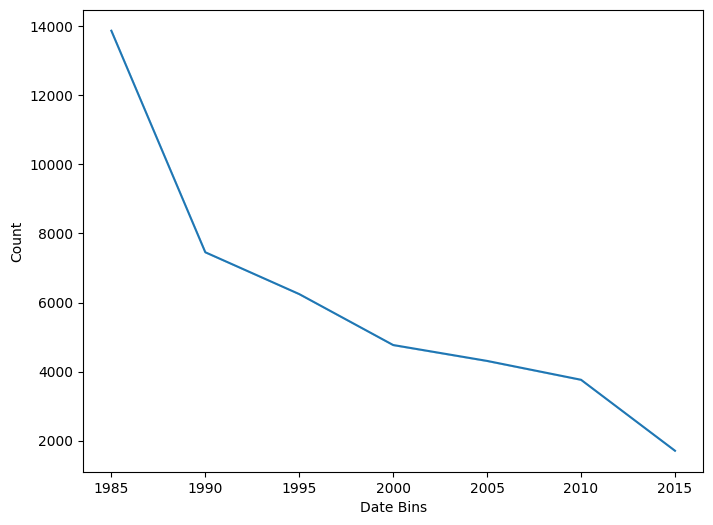

In [109]:
# Line Plot: Year and accident Count

# Adjust plot size
plt.figure(figsize=(8, 6))

# Plot Year and Count
p=sns.lineplot(data=year_df, x='Date Bins', y='Count') #, hue='incident_type'

# Adjust legend 
#sns.move_legend(p, 'lower center', bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)